In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [20]:
# Loading ADX data
ADX_data = pd.read_csv('Q4_ADX_Sample_data.csv')



In [21]:
ADX_data.head()

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392


In [22]:
#Looking for null values
ADX_data.isnull().sum()

date                0
pub_id              0
app_id              0
ad_unit_code        0
country           420
requests            0
ae_responses        0
ae_impressions      0
ae_clicks           0
ae_revenue          0
dtype: int64

In [23]:
#Information of the data
ADX_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47935 entries, 0 to 47934
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            47935 non-null  object 
 1   pub_id          47935 non-null  int64  
 2   app_id          47935 non-null  int64  
 3   ad_unit_code    47935 non-null  int64  
 4   country         47515 non-null  object 
 5   requests        47935 non-null  int64  
 6   ae_responses    47935 non-null  int64  
 7   ae_impressions  47935 non-null  int64  
 8   ae_clicks       47935 non-null  int64  
 9   ae_revenue      47935 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 3.7+ MB


In [24]:
#Shape of the data
ADX_data.shape



(47935, 10)

In [27]:
##We will be using Isolation Forest for anomaly detection.
#Importing required libraries before anomaly detection
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest


In [28]:
#Choosing the columns for anomaly detection
inputs = ['requests',
       'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue']



In [29]:
#Normalization of the data
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(ADX_data[inputs])

In [30]:
#Fitting Isolation forest
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(X)

# predict raw anomaly score
ADX_data['anomaly_score'] = clf.decision_function(X)
        
# prediction of a datapoint category outlier or inlier
ADX_data['anomaly'] = clf.predict(X)

In [31]:
#Viewing the datatpoints which are anomalies with value anomaly =-1
ADX_data[ADX_data['anomaly'] == -1]

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue,anomaly_score,anomaly
675,2022-10-11,14,22693095,22752632444,India,13381,11254,3303,126,1.344264,-0.008930,-1
692,2022-10-11,14,22693095,22752080475,Brazil,5099,4642,2069,390,34.695616,-0.011062,-1
694,2022-10-11,14,22693095,22752632444,Brazil,10804,10789,2346,133,8.692469,-0.002344,-1
842,2022-10-11,14,22693095,22752080475,United States,14469,11127,4808,522,289.267323,-0.078063,-1
844,2022-10-11,14,22693095,22752632444,United States,21589,20848,4405,244,112.000234,-0.067351,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
40777,2022-10-16,72,84650721,22477473702,India,5424,5424,4979,658,5.299380,-0.003377,-1
40898,2022-10-26,72,84650721,22477473702,India,5200,5200,4678,556,4.308571,-0.001205,-1
41037,2022-10-18,72,84650721,22477473702,India,6710,6708,6176,737,7.139920,-0.027529,-1
41379,2022-10-28,72,84650721,22477473702,India,4999,4998,4557,472,4.383488,-0.000690,-1


In [32]:
#Count of anomalies detected for each app. 
ADX_data[ADX_data['anomaly'] == -1]['app_id'].value_counts()

22693095    190
63338696     82
47862278     69
40931528     50
43840611     49
66981243     31
84650721      9
Name: app_id, dtype: int64

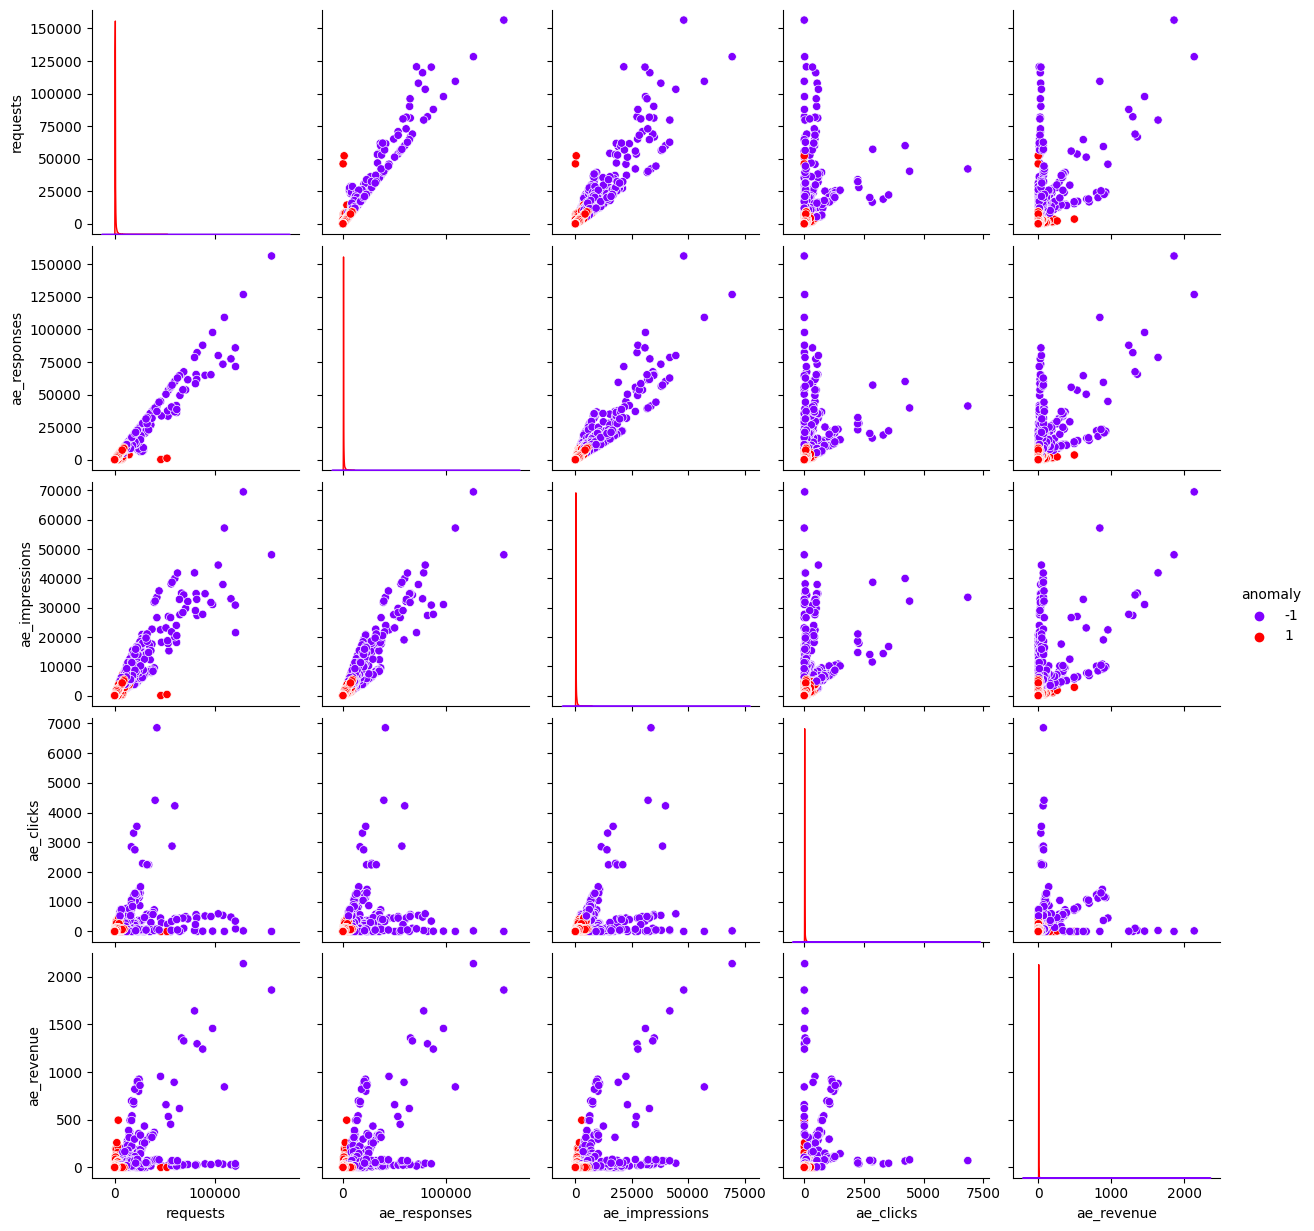

In [33]:
#Plotting a pairplot to look view amolies and non-anomalies in the data.
sns.pairplot(ADX_data, vars = inputs,hue='anomaly',palette='rainbow')

# It is observed that when there are more number of requests the clicks, impressions, responses and revenue gets influenced.